In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to tune
alphas = np.logspace(-6, 6, 13)

In [4]:
# Create a Ridge Regression model
ridge = Ridge()

# Perform hyperparameter tuning using cross-validation
grid_search = GridSearchCV(ridge, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

Best alpha: 1.0


In [5]:
# Train the Ridge Regression model with the best alpha on the entire training data
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_best.predict(X_test)

In [6]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03909724311678362


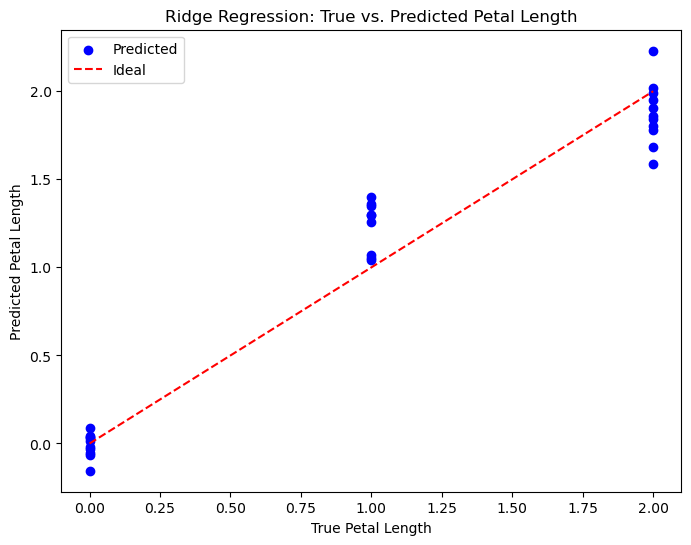

In [8]:
# Plot the true target and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.xlabel('True Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Ridge Regression: True vs. Predicted Petal Length')
plt.legend()
plt.show()
